<a href="https://colab.research.google.com/github/Amanblackdevil/Machine-Learning/blob/main/CGPA_Vs_Package_LR_and_XGBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
upload_files = files.upload()

Saving placement.csv to placement.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(upload_files['placement.csv']))

In [4]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


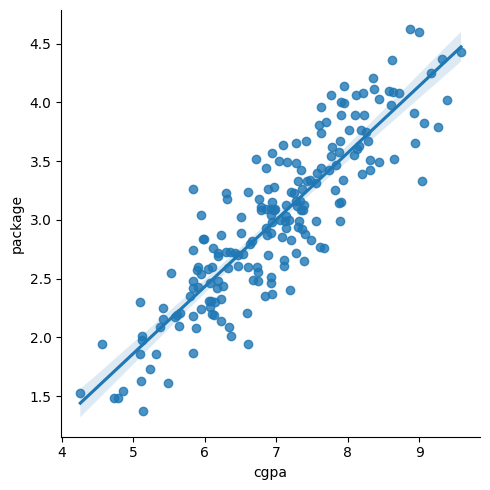

In [26]:
import seaborn as sns
sns.lmplot(x='cgpa', y='package', data=df)

In [7]:
from sklearn.model_selection import train_test_split

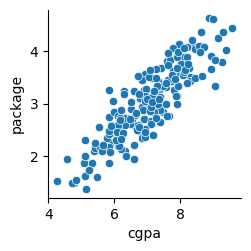

In [9]:
sns.pairplot(df, x_vars='cgpa', y_vars='package')
plt.show()

In [10]:
X = df['cgpa']
X.head()

0    6.89
1    5.12
2    7.82
3    7.42
4    6.94
Name: cgpa, dtype: float64

In [11]:
y = df['package']
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [15]:
X = df.iloc[:, 0:1]
y = df.iloc[:, 1]

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test.shape

(40, 1)

In [22]:
y_pred = lr.predict(X_test)
y_pred

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

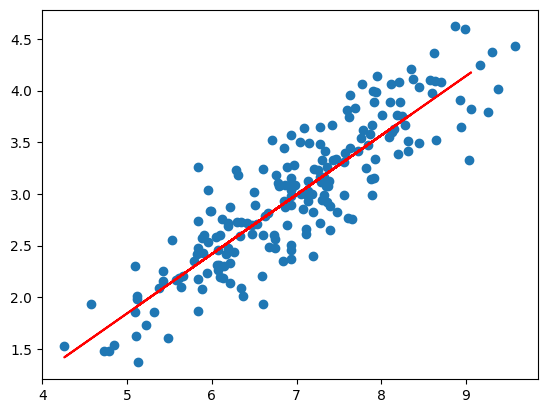

In [24]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_test, lr.predict(X_test), color='red')

In [28]:
m = lr.coef_
m

array([0.57425647])

In [36]:
b = lr.intercept_
b

-1.0270069374542108

In [35]:
X_test.shape

(40, 1)

In [38]:
y = 0.57425647*40 + -1.0270069374542108
y

21.94325186254579

In [39]:
#With the help of xgboosting
xg_df = pd.read_csv(io.BytesIO(upload_files['placement.csv']))
xg_df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [44]:
from sklearn.impute import SimpleImputer
import numpy as np

In [46]:
X = xg_df['cgpa']
y = xg_df['package']

X

0      6.89
1      5.12
2      7.82
3      7.42
4      6.94
       ... 
195    6.93
196    5.89
197    7.21
198    7.63
199    6.22
Name: cgpa, Length: 200, dtype: float64

In [47]:
X = xg_df.iloc[:, 0:1]
y = xg_df.iloc[:, 1]

y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [50]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
imputer = SimpleImputer()
train_X = imputer.fit_transform(train_X)
test_X = imputer.fit_transform(test_X)

In [52]:
from xgboost import XGBRegressor
my_model = XGBRegressor()
#Verbose=false because we are avoiding print of values of update columns
my_model.fit(train_X, train_y, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
predictions = my_model.predict(test_X)
from sklearn.metrics import mean_absolute_error
print("Mean absolute error", str(mean_absolute_error(predictions, test_y)))

Mean absolute error 0.3359793125391006


In [55]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(test_X, test_y)], verbose=False)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)